m = [1.93939394]
b = [4.73333333]


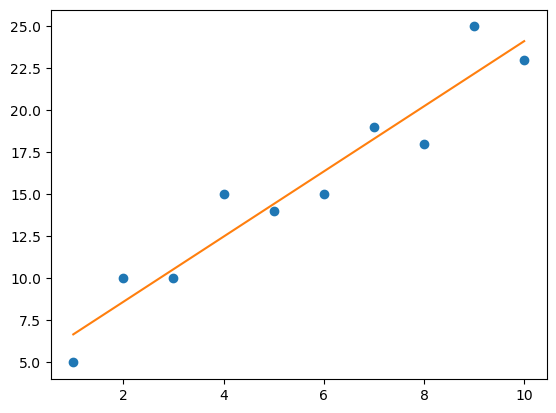

In [1]:
#Linear Regression with small data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Input data
X = df.values[:, :-1]
Y = df.values[:, -1]

# Choice of Linear Regression method for my data
fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))
#m=1.93939394 , b=4.73333333

plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

In [9]:
# Finding above coefficients m and b by the Gradient Descent using Linear Regression

# FIRST STEP: Finding partial derivatives for coefficcients m and b using SymPy
from sympy import *
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

# Sum of squares for Linear Regression
sum_of_squares = Sum((m*x(i)+b - y(i)) ** 2, (i,0,n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [13]:
# Finding above coefficients m and b by the Gradient Descent using Linear Regression

# SECOND STEP: Using calculated partial derivatives to computed coefficcients m and b by Gradeint Descent method.
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Creating model
m = 0.0
b = 0.0

# Pace of learning
L = .001

# Amount of iterations
iterations = 10000

# Gradient Descent
for i in range(iterations):
    # Coefficient m descent using previously computed derivative for m 
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    # Coefficient b descent using previously computed derivative for b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    # learning pace update
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))


y = 1.9393939393939548x + 4.733333333333227


In [19]:
# Finding above coefficients m and b by the STOCHASTIC Gradient Descent using Linear Regression

import pandas as pd
import numpy as np

data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

# Input data
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]

# Creating model
m = 0.0
b = 0.0

# Pace of learning
L = .0001
# Amount of iterations
epochs = 100000
# Sample size
sample_size = 1

# STOCHASTIC GRADIENT DESCENT
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_real = X[idx]
    y_real = Y[idx]

    # Predicted Y value for Linear Regression
    Y_pred = m * x_real + b

    '''
    Mean Squared Error:
    (1/n) * Sum((y_real - y_pred)**2) 
    '''
    # Derivative (for coefficient m) of Loss Function/Cost Function in Linear Regression(Mean Squared Error)
    D_m = (-2 / sample_size) * sum(x_real * (y_real - Y_pred))
    # Derivative (for coefficient b) of Loss Function/Cost Function in Linear Regression(Mean Squared Error)
    D_b =(-2 / sample_size) * sum(y_real - Y_pred)
    
    # Minimizing the cost function
    m = m - L * D_m  # Update of coefficient m
    b = b - L * D_b  # Update of coefficient b

    # Show progress
    if i % 10000 == 0:
        print(i, m, b)

# Approximate result for coefficients “m” and “b” due to random nature of STOCHASTIC GRADIENT DESCENT
print("y = {0}x + {1}".format(m,b))

0 0.018000000000000002 0.003
10000 2.324321701090577 1.8641011145813693
20000 2.222245192479563 2.842433173642335
30000 2.1046456433203558 3.476863641959392
40000 2.0358200354758247 3.9136203102335876
50000 2.010959465296555 4.196449236591988
60000 2.007251804453916 4.404518290900192
70000 1.9881627170214522 4.4998548692196
80000 1.9579209879167823 4.570067487239434
90000 1.9348467630255646 4.641718291270981
y = 1.9237056972127016x + 4.671674927462402
